<a href="https://colab.research.google.com/github/skybluesharkk/colab_ml/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89-%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80_%EC%A0%81%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import pandas as pd
titanic = pd.read_csv('train.csv')

In [119]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [120]:
titanic = titanic.drop(['Name','Age','PassengerId','Parch','Fare','Cabin','Ticket'],axis=1)
titanic['Sex']=titanic['Sex'].replace({'female': 0, 'male': 1})
mode_value = titanic['Embarked'].mode()[0]
titanic['Embarked'] = titanic['Embarked'].fillna(mode_value)
titanic['Embarked']=titanic['Embarked'].replace({'S':0,'C':1,'Q':2})

In [121]:
titanic.head()

,Survived,Pclass,Sex,SibSp,Embarked
0,0,3,1,1,0
1,1,1,0,1,1
2,1,3,0,0,0
3,1,1,0,1,0
4,0,3,1,0,0


In [122]:
titanic_target = titanic['Survived'].to_numpy()
titanic_input = titanic[['Pclass','SibSp','Sex','Embarked']].to_numpy()

In [123]:
print(titanic)

     Survived  Pclass  Sex  SibSp  Embarked
0           0       3    1      1         0
1           1       1    0      1         1
2           1       3    0      0         0
3           1       1    0      1         0
4           0       3    1      0         0
..        ...     ...  ...    ...       ...
886         0       2    1      0         0
887         1       1    0      0         0
888         0       3    0      1         0
889         1       1    1      0         1
890         0       3    1      0         2

[891 rows x 5 columns]


In [124]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(titanic_input,titanic_target,random_state=42)

In [125]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [131]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log',max_iter=10000,tol=None,random_state=42)
sc.fit(train_scaled,train_target)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(loss='log', max_iter=10000, random_state=42, tol=None)

In [135]:
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.7979041916167665
0.8071748878923767


In [133]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.7979041916167665
0.8071748878923767


In [136]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score=[]
test_score=[]
classes = np.unique(train_target)

In [137]:
for i in range(0,300):
  sc.partial_fit(train_scaled, train_target,classes=classes)
  train_score.append(sc.score(train_scaled,train_target))
  test_score.append(sc.score(test_scaled,test_target))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


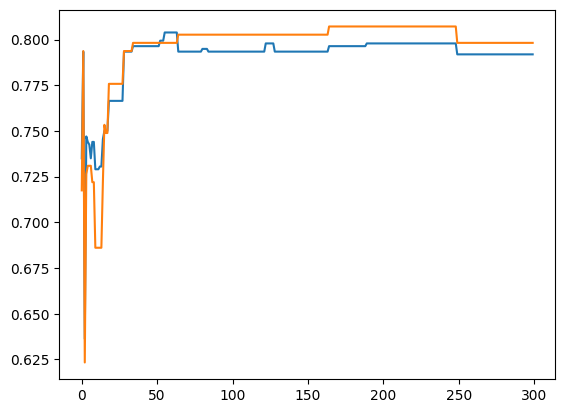

In [138]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.show()

In [141]:
sc = SGDClassifier(loss='log',max_iter=300,tol=None,random_state=42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.7979041916167665
0.8071748878923767


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
